In [14]:
!pip install MiniSom

## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

# Training the SOM

In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results

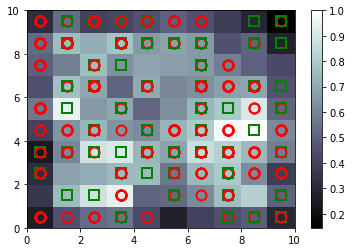

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

# Printing the Fraunch Clients

In [8]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15796813
15731166
15729771
15701687
15721507
15644446
15585892
15609356
15714087
15588123
15672432
15583680
15730793
15572390
15575243
15654859
15566495
15663194
15631693
15671534
15613699
15667460
15569394
15594651


# Part 2 - Going from Unsupervised to Supervised Deep Learning

Create Matrix of Features

In [9]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

In [13]:
import tensorflow as tf
tf.__version__

## Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 921us/step - loss: 1.0211 - accuracy: 0.4449
Epoch 2/10
690/690 [==============================] - 1s 943us/step - loss: 0.5365 - accuracy: 0.8536
Epoch 3/10
690/690 [==============================] - 1s 920us/step - loss: 0.3965 - accuracy: 0.9232
Epoch 4/10
690/690 [==============================] - 1s 911us/step - loss: 0.3335 - accuracy: 0.9290
Epoch 5/10
690/690 [==============================] - 1s 924us/step - loss: 0.2987 - accuracy: 0.9304
Epoch 6/10
690/690 [==============================] - 1s 908us/step - loss: 0.2786 - accuracy: 0.9304
Epoch 7/10
690/690 [==============================] - 1s 945us/step - loss: 0.2662 - accuracy: 0.9304
Epoch 8/10
690/690 [==============================] - 1s 920us/step - loss: 0.2581 - accuracy: 0.9304
Epoch 9/10
690/690 [==============================] - 1s 904us/step - loss: 0.2509 - accuracy: 0.9304
Epoch 10/10
690/690 [==============================] - 1s 908us/step - loss: 0.240

## Predicting test set results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]